

---

#  **Problem Statement**

The ASI dataset contains operational and financial details of industrial units, and we aim to analyze factors affecting performance.
Using EDA and linear regression, we will model and predict the Total Cost of Production based on key operational and organizational feature 


 
# **Objectives**

### ***1 Identify cost drivers***

Analyze which operational and financial factors contribute most to total production cost.
Use EDA to uncover patterns affecting cost efficiency.

### ***2 Study export performance***

Examine how characteristics like R&D, ISO certification, and industry type influence export share.
Identify industries with high export potential.

### ***3 Measure productivity***

Create productivity indicators and compare performance across states, sectors, and industries.
Find factors associated with higher productivity.

### ***4 Compare ISO vs non-ISO units***

Identify operational and financial differences between ISO-certified and non-certified units.
Understand how certification relates to performance.

### ***5 Analyze unit status and survival***

Explore what drives a unit to be active, seasonal, or under-performing.
Use operational variables to detect risk indicators.
  

 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_regression , RFE


In [2]:
import os 
os.chdir(r"D:\Users\Desktop\data\Data")

data1 = pd.read_csv("block_A.csv")


data1.head(5)

,year,block,dsl_a,psl_no,scheme_code,nic_class_4d,nic_subclass_5d,state_code,district_code,sector,...,unit_status,bonus_rs,pf_contribution,welfare_exp,manuf_working_days,nonmanuf_working_days,total_working_days,total_cost_production,export_share_percent,multiplier
0,24,A,100001,99999,1,9999,12007,1,99,2,...,4,0,0,0,0,0,0,0.0,0,1.0
1,24,A,100002,99999,1,9999,12007,1,99,2,...,1,0,0,0,306,0,306,11466542.0,0,1.0
2,24,A,100003,99999,1,9999,12007,1,99,2,...,3,0,0,0,0,0,0,0.0,0,1.0
3,24,A,100004,99999,1,9999,12007,1,99,2,...,1,0,0,3200,87,0,87,6004550.0,0,1.0
4,24,A,100005,99999,1,9999,12007,1,99,2,...,1,242900,43666,0,305,0,305,28315123.0,0,1.0


In [3]:
data1.shape

(68641, 22)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68641 entries, 0 to 68640
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   68641 non-null  int64  
 1   block                  68641 non-null  object 
 2   dsl_a                  68641 non-null  int64  
 3   psl_no                 68641 non-null  int64  
 4   scheme_code            68641 non-null  int64  
 5   nic_class_4d           68641 non-null  int64  
 6   nic_subclass_5d        68641 non-null  int64  
 7   state_code             68641 non-null  int64  
 8   district_code          68641 non-null  int64  
 9   sector                 68641 non-null  int64  
 10  ro_sro_code            68641 non-null  int64  
 11  num_units              68641 non-null  int64  
 12  unit_status            68641 non-null  int64  
 13  bonus_rs               68641 non-null  int64  
 14  pf_contribution        68641 non-null  int64  
 15  we

In [5]:
data1.columns

Index(['year', 'block', 'dsl_a', 'psl_no', 'scheme_code', 'nic_class_4d',
       'nic_subclass_5d', 'state_code', 'district_code', 'sector',
       'ro_sro_code', 'num_units', 'unit_status', 'bonus_rs',
       'pf_contribution', 'welfare_exp', 'manuf_working_days',
       'nonmanuf_working_days', 'total_working_days', 'total_cost_production',
       'export_share_percent', 'multiplier'],
      dtype='object')

In [6]:
(data1.isnull().sum() / len(data1)) * 100



year                     0.0
block                    0.0
dsl_a                    0.0
psl_no                   0.0
scheme_code              0.0
nic_class_4d             0.0
nic_subclass_5d          0.0
state_code               0.0
district_code            0.0
sector                   0.0
ro_sro_code              0.0
num_units                0.0
unit_status              0.0
bonus_rs                 0.0
pf_contribution          0.0
welfare_exp              0.0
manuf_working_days       0.0
nonmanuf_working_days    0.0
total_working_days       0.0
total_cost_production    0.0
export_share_percent     0.0
multiplier               0.0
dtype: float64

In [7]:
data2 = pd.read_csv("block_B.csv")

data2.head(5)

,year,block,dsl_b,org_type,cin,iso_certified,initial_prod_year,acc_year_from,acc_year_to,months_operation,foreign_share,rd_unit,formal_training
0,24,B,100001,7,1.000000e+21,2,0,4,32024,0,2,3,2
1,24,B,100002,1,1.000000e+21,2,2017,4,32024,12,2,3,2
2,24,B,100003,1,1.000000e+21,2,2020,4,32024,0,2,3,2
3,24,B,100004,1,1.000000e+21,2,2019,4,32024,5,2,3,2
4,24,B,100005,1,1.000000e+21,2,2019,4,32024,12,2,3,2


In [8]:
data2.columns

Index(['year', 'block', 'dsl_b', 'org_type', 'cin', 'iso_certified',
       'initial_prod_year', 'acc_year_from', 'acc_year_to', 'months_operation',
       'foreign_share', 'rd_unit', 'formal_training'],
      dtype='object')

In [9]:
# Important Block B columns 
blockB_cols = [
    "year",
    "block",
    "dsl_b",
    "org_type",
    "initial_prod_year",
    "months_operation",
    "foreign_share",
    "rd_unit",
    "formal_training"
]

# Merge Block A + imp Block B columns
merged = data1.merge(
    data2[blockB_cols],
    left_on=["year", "dsl_a"],
    right_on=["year", "dsl_b"],
    how="left"
)

merged.head(5)

,year,block_x,dsl_a,psl_no,scheme_code,nic_class_4d,nic_subclass_5d,state_code,district_code,sector,...,export_share_percent,multiplier,block_y,dsl_b,org_type,initial_prod_year,months_operation,foreign_share,rd_unit,formal_training
0,24,A,100001,99999,1,9999,12007,1,99,2,...,0,1.0,B,100001,7,0,0,2,3,2
1,24,A,100002,99999,1,9999,12007,1,99,2,...,0,1.0,B,100002,1,2017,12,2,3,2
2,24,A,100003,99999,1,9999,12007,1,99,2,...,0,1.0,B,100003,1,2020,0,2,3,2
3,24,A,100004,99999,1,9999,12007,1,99,2,...,0,1.0,B,100004,1,2019,5,2,3,2
4,24,A,100005,99999,1,9999,12007,1,99,2,...,0,1.0,B,100005,1,2019,12,2,3,2


In [10]:
merged.columns

Index(['year', 'block_x', 'dsl_a', 'psl_no', 'scheme_code', 'nic_class_4d',
       'nic_subclass_5d', 'state_code', 'district_code', 'sector',
       'ro_sro_code', 'num_units', 'unit_status', 'bonus_rs',
       'pf_contribution', 'welfare_exp', 'manuf_working_days',
       'nonmanuf_working_days', 'total_working_days', 'total_cost_production',
       'export_share_percent', 'multiplier', 'block_y', 'dsl_b', 'org_type',
       'initial_prod_year', 'months_operation', 'foreign_share', 'rd_unit',
       'formal_training'],
      dtype='object')

In [11]:
merged.shape

(68641, 30)

In [12]:
(merged.isnull().sum() / len (merged)) * 100

year                     0.0
block_x                  0.0
dsl_a                    0.0
psl_no                   0.0
scheme_code              0.0
nic_class_4d             0.0
nic_subclass_5d          0.0
state_code               0.0
district_code            0.0
sector                   0.0
ro_sro_code              0.0
num_units                0.0
unit_status              0.0
bonus_rs                 0.0
pf_contribution          0.0
welfare_exp              0.0
manuf_working_days       0.0
nonmanuf_working_days    0.0
total_working_days       0.0
total_cost_production    0.0
export_share_percent     0.0
multiplier               0.0
block_y                  0.0
dsl_b                    0.0
org_type                 0.0
initial_prod_year        0.0
months_operation         0.0
foreign_share            0.0
rd_unit                  0.0
formal_training          0.0
dtype: float64

In [13]:
merged.describe()

,year,dsl_a,psl_no,scheme_code,nic_class_4d,nic_subclass_5d,state_code,district_code,sector,ro_sro_code,...,total_cost_production,export_share_percent,multiplier,dsl_b,org_type,initial_prod_year,months_operation,foreign_share,rd_unit,formal_training
count,68641.0,68641.000000,68641.0,68641.000000,68641.0,68641.000000,68641.000000,68641.0,68641.000000,68641.0,...,6.864100e+04,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000
mean,24.0,152300.622806,99999.0,1.286112,9999.0,22163.749873,20.912880,99.0,1.534928,9999.0,...,1.527519e+09,3.650617,3.573476,152300.622806,4.792034,1787.666846,9.885244,1.959966,2.948588,1.918635
std,0.0,39604.841667,0.0,0.451946,0.0,10552.330985,10.411057,0.0,0.498782,0.0,...,2.075274e+10,16.691116,4.954041,39604.841667,2.811182,621.662139,4.385893,0.196041,0.270262,0.273397
min,24.0,100001.000000,99999.0,1.000000,9999.0,1631.000000,1.000000,99.0,1.000000,9999.0,...,0.000000e+00,0.000000,0.000000,100001.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.0,119145.000000,99999.0,1.000000,9999.0,13999.000000,9.000000,99.0,1.000000,9999.0,...,8.118143e+06,0.000000,1.000000,119145.000000,2.000000,1990.000000,12.000000,2.000000,3.000000,2.000000
50%,24.0,140620.000000,99999.0,1.000000,9999.0,22203.000000,24.000000,99.0,2.000000,9999.0,...,1.029132e+08,0.000000,1.000000,140620.000000,6.000000,2005.000000,12.000000,2.000000,3.000000,2.000000
75%,24.0,202479.000000,99999.0,2.000000,9999.0,27201.000000,29.000000,99.0,2.000000,9999.0,...,6.204183e+08,0.000000,3.000000,202479.000000,7.000000,2014.000000,12.000000,2.000000,3.000000,2.000000
max,24.0,219639.000000,99999.0,2.000000,9999.0,96010.000000,37.000000,99.0,2.000000,9999.0,...,3.758040e+12,100.000000,48.000000,219639.000000,9.000000,2024.000000,12.000000,2.000000,3.000000,2.000000


In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68641 entries, 0 to 68640
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   68641 non-null  int64  
 1   block_x                68641 non-null  object 
 2   dsl_a                  68641 non-null  int64  
 3   psl_no                 68641 non-null  int64  
 4   scheme_code            68641 non-null  int64  
 5   nic_class_4d           68641 non-null  int64  
 6   nic_subclass_5d        68641 non-null  int64  
 7   state_code             68641 non-null  int64  
 8   district_code          68641 non-null  int64  
 9   sector                 68641 non-null  int64  
 10  ro_sro_code            68641 non-null  int64  
 11  num_units              68641 non-null  int64  
 12  unit_status            68641 non-null  int64  
 13  bonus_rs               68641 non-null  int64  
 14  pf_contribution        68641 non-null  int64  
 15  we

In [15]:

print(f"Duplicate rows: {merged.duplicated().sum()}")

Duplicate rows: 0


In [16]:

categorical_cols = merged.select_dtypes(include=['object']).columns.tolist()
numerical_cols = merged.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")


Categorical columns (2): ['block_x', 'block_y']
Numerical columns (28): ['year', 'dsl_a', 'psl_no', 'scheme_code', 'nic_class_4d', 'nic_subclass_5d', 'state_code', 'district_code', 'sector', 'ro_sro_code', 'num_units', 'unit_status', 'bonus_rs', 'pf_contribution', 'welfare_exp', 'manuf_working_days', 'nonmanuf_working_days', 'total_working_days', 'total_cost_production', 'export_share_percent', 'multiplier', 'dsl_b', 'org_type', 'initial_prod_year', 'months_operation', 'foreign_share', 'rd_unit', 'formal_training']


count    6.864100e+04
mean     1.527519e+09
std      2.075274e+10
min      0.000000e+00
25%      8.118143e+06
50%      1.029132e+08
75%      6.204183e+08
max      3.758040e+12
Name: total_cost_production, dtype: float64
skewness : 103.06


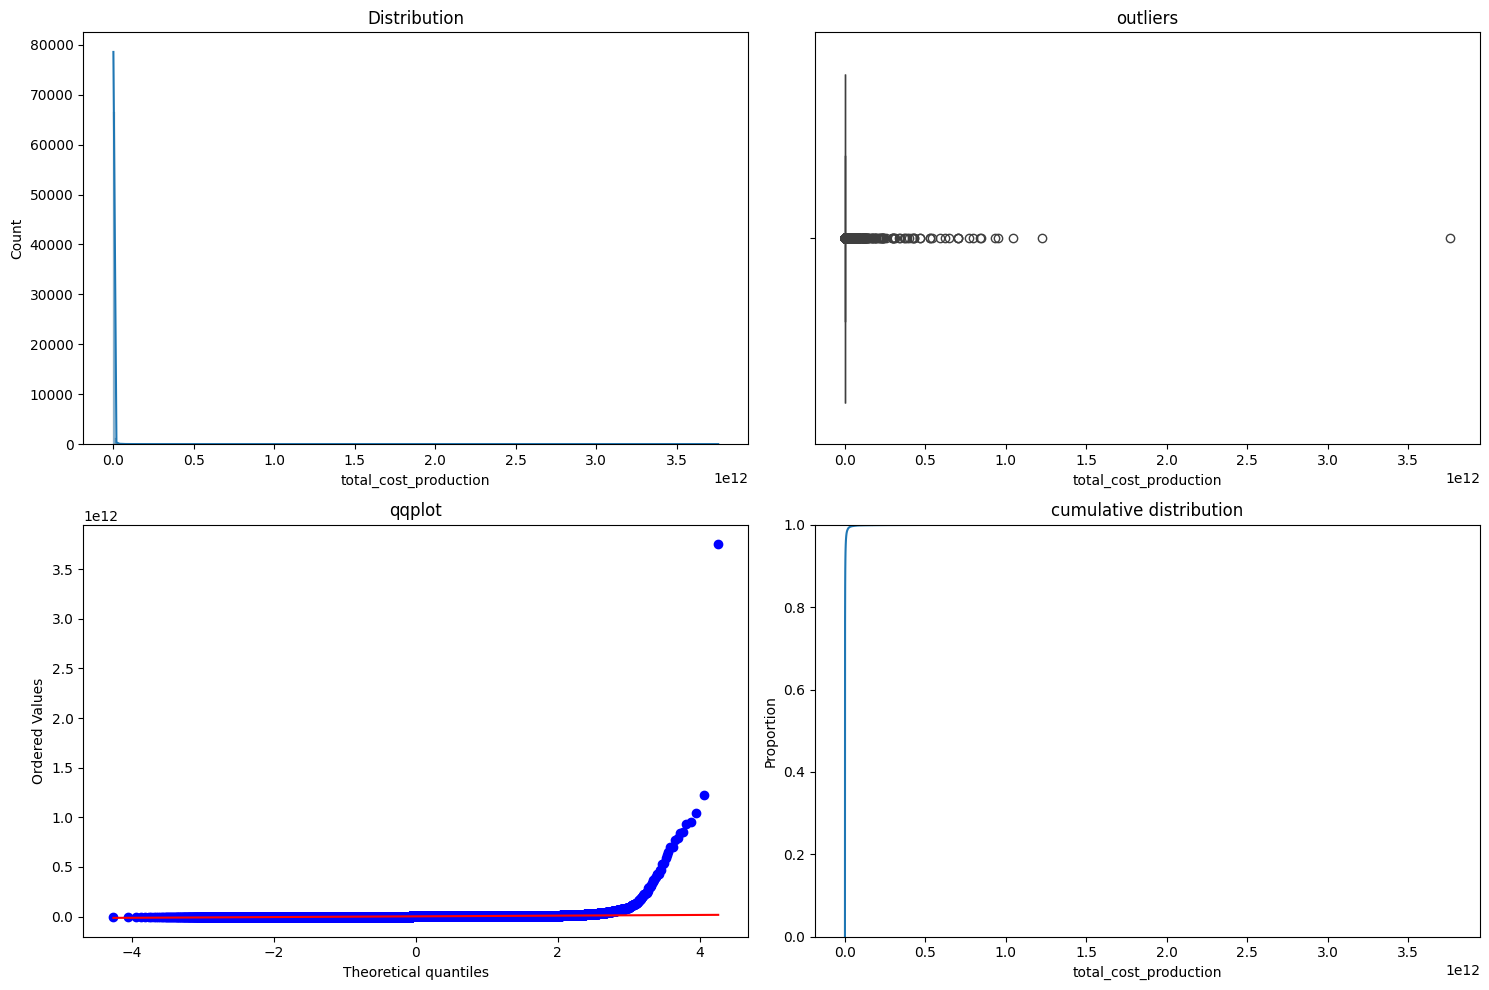

In [17]:
merged['total_cost_production'] = (
    merged["total_cost_production"]
    .astype(str)
    .str.replace(r'[$]', '', regex=True)
    .astype(float)
)

target_col = 'total_cost_production'

print(merged[target_col].describe())
print(f"skewness : {merged[target_col].skew():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=merged, x=target_col, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution")

sns.boxplot(data=merged,x=target_col, ax = axes[0,1])
axes[0,1].set_title('outliers')

#qq plot for normality check 
from scipy import stats
stats.probplot(merged[target_col].dropna(),dist='norm',plot = axes[1,0])
axes[1,0].set_title('qqplot')


#cumulative distribution

sns.ecdfplot(data = merged, x = target_col , ax = axes[1,1])
axes[1,1].set_title ('cumulative distribution')

plt.tight_layout()
plt.show()


In [18]:
merged[target_col].sort_values(ascending=False).head(10)


25268    3.758040e+12
4607     1.221980e+12
25270    1.043170e+12
39439    9.511110e+11
25262    9.326220e+11
36867    8.481800e+11
30345    8.391270e+11
20723    7.953120e+11
45098    7.697330e+11
5518     7.039840e+11
Name: total_cost_production, dtype: float64

Original Total Cost Stats:
count    6.864100e+04
mean     1.527519e+09
std      2.075274e+10
min      0.000000e+00
25%      8.118143e+06
50%      1.029132e+08
75%      6.204183e+08
max      3.758040e+12
Name: total_cost_production, dtype: float64
Original Skewness: 103.06

After Removing Zeros:
count    5.935000e+04
mean     1.766646e+09
std      2.230864e+10
min      1.000000e+00
25%      2.540253e+07
50%      1.733369e+08
75%      7.932525e+08
max      3.758040e+12
Name: total_cost_production, dtype: float64
Skewness After Removing Zeros: 95.92

Log Transformed Stats:
count    59350.000000
mean        18.689281
std          2.569110
min          0.693147
25%         17.050360
50%         18.970748
75%         20.491652
max         28.954919
Name: log_total_cost, dtype: float64
Log Skewness: -0.60

After Winsorization (Top 1% Capped):
count    59350.000000
mean        18.680864
std          2.549735
min          0.693147
25%         17.050360
50%         18.970748
75%         20.49165

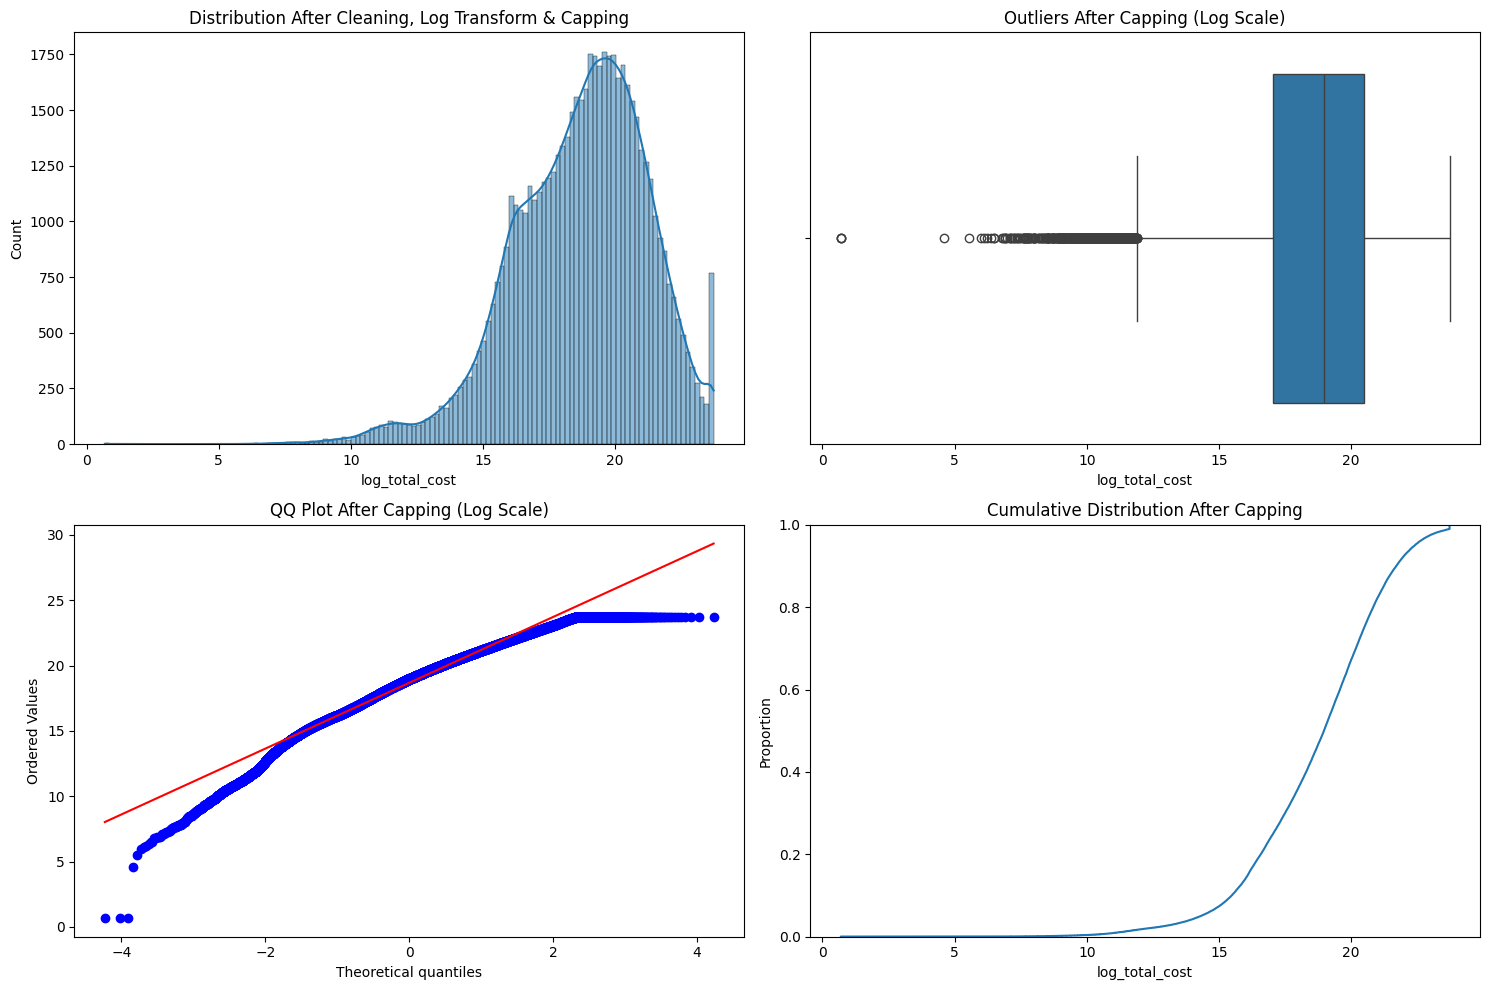

In [19]:

merged['total_cost_production'] = (
    merged['total_cost_production']
    .astype(str)
    .str.replace(r'[$]', '', regex=True)
    .astype(float)
)

target_col = 'total_cost_production'

print("Original Total Cost Stats:")
print(merged[target_col].describe())
print(f"Original Skewness: {merged[target_col].skew():.2f}\n")


merged = merged[merged['total_cost_production'] > 0]

print("After Removing Zeros:")
print(merged[target_col].describe())
print(f"Skewness After Removing Zeros: {merged[target_col].skew():.2f}\n")



#  LOG TRANSFORMATION

merged['log_total_cost'] = np.log1p(merged[target_col])

print("Log Transformed Stats:")
print(merged['log_total_cost'].describe())
print(f"Log Skewness: {merged['log_total_cost'].skew():.2f}\n")



#  CAP OUTLIERS (TOP 1%)

upper = merged['log_total_cost'].quantile(0.99)
merged['log_total_cost'] = np.where(
    merged['log_total_cost'] > upper,
    upper,
    merged['log_total_cost']
)

print("After Winsorization (Top 1% Capped):")
print(merged['log_total_cost'].describe())
print(f"Skewness After Capping: {merged['log_total_cost'].skew():.2f}\n")




fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram (log scale)
sns.histplot(data=merged, x='log_total_cost', kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution After Cleaning, Log Transform & Capping")

# Boxplot (log scale)
sns.boxplot(data=merged, x='log_total_cost', ax=axes[0, 1])
axes[0, 1].set_title("Outliers After Capping (Log Scale)")

# QQ Plot (log scale)
stats.probplot(merged['log_total_cost'].dropna(), dist='norm', plot=axes[1, 0])
axes[1, 0].set_title("QQ Plot After Capping (Log Scale)")

# ECDF Plot (log scale)
sns.ecdfplot(data=merged, x='log_total_cost', ax=axes[1, 1])
axes[1, 1].set_title("Cumulative Distribution After Capping")

plt.tight_layout()
plt.show()


Original Total Cost Stats:
count    5.935000e+04
mean     1.766646e+09
std      2.230864e+10
min      1.000000e+00
25%      2.540253e+07
50%      1.733369e+08
75%      7.932525e+08
max      3.758040e+12
Name: total_cost_production, dtype: float64
Original Skewness: 95.92

Optimal Box-Cox Lambda (λ): 0.0690
Box-Cox Transformed Stats:
count    59350.000000
mean        38.949106
std          9.093049
min          0.000000
25%         32.513809
50%         39.175725
75%         45.115531
max         92.410127
Name: boxcox_total_cost, dtype: float64
Box-Cox Skewness: 0.01

Removed 223 extreme outliers based on 3-sigma rule (on Box-Cox data).
Final Cleaned Stats (Post Box-Cox and 3-Sigma):
count    59127.000000
mean        38.905865
std          8.898702
min         11.680482
25%         32.523230
50%         39.164710
75%         45.064579
max         66.180670
Name: boxcox_total_cost, dtype: float64
Final Skewness: -0.06



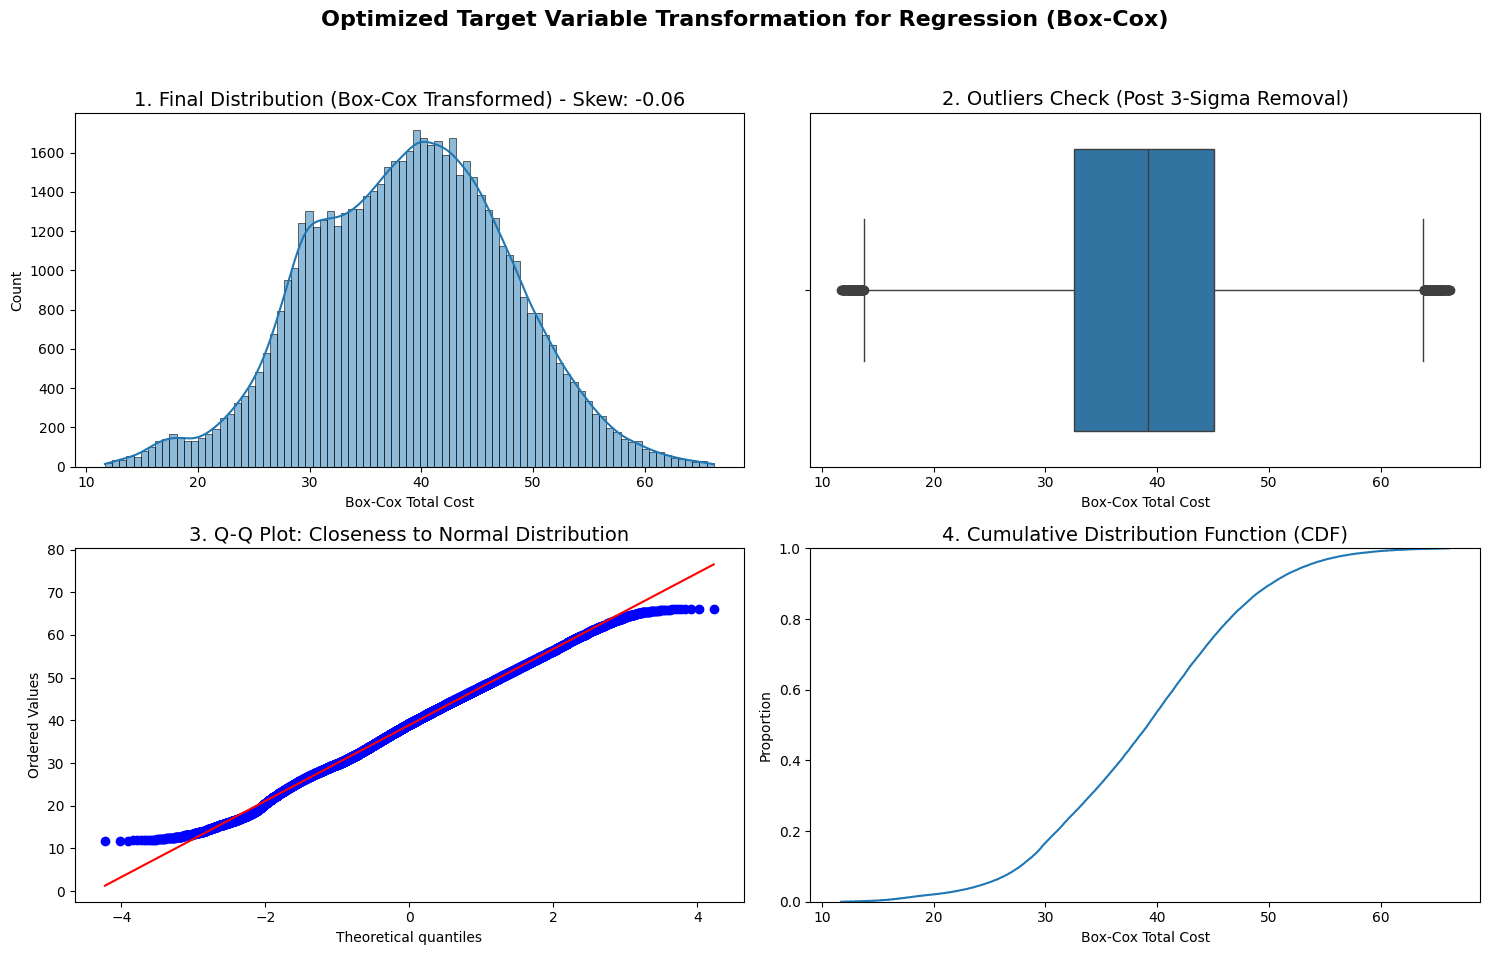

In [20]:

target_col = 'total_cost_production'


#  (handling any $ signs if present)
merged[target_col] = (
    merged[target_col]
    .astype(str)
    .str.replace(r'[$]', '', regex=True)
    .astype(float)
)

print("Original Total Cost Stats:")
print(merged[target_col].describe())
print(f"Original Skewness: {merged[target_col].skew():.2f}\n")



# Box-Cox finds the optimal lambda (power parameter) to achieve a normal distribution.
transformed_data, optimal_lambda = stats.boxcox(merged[target_col])
merged['boxcox_total_cost'] = transformed_data

print(f"Optimal Box-Cox Lambda (λ): {optimal_lambda:.4f}")
print("Box-Cox Transformed Stats:")
print(merged['boxcox_total_cost'].describe())
print(f"Box-Cox Skewness: {merged['boxcox_total_cost'].skew():.2f}\n")



# Identify and remove outliers that fall outside 3 standard deviations
# from the mean of the new, near-normal distribution.
transformed_col = 'boxcox_total_cost'
mu = merged[transformed_col].mean()
sigma = merged[transformed_col].std()
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

# Filter the DataFrame to remove the extreme outliers
n_before_outlier_removal = len(merged)
merged_clean = merged[
    (merged[transformed_col] >= lower_bound) &
    (merged[transformed_col] <= upper_bound)
].copy()

n_removed = n_before_outlier_removal - len(merged_clean)
print(f"Removed {n_removed} extreme outliers based on 3-sigma rule (on Box-Cox data).")

# Update the main 'merged' variable to the cleaned version for visualization
merged = merged_clean
final_col = merged['boxcox_total_cost']

print("Final Cleaned Stats (Post Box-Cox and 3-Sigma):")
print(final_col.describe())
print(f"Final Skewness: {final_col.skew():.2f}\n")



fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram (Check for Normality)
sns.histplot(x=final_col, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f"1. Final Distribution (Box-Cox Transformed) - Skew: {final_col.skew():.2f}", fontsize=14)
axes[0, 0].set_xlabel("Box-Cox Total Cost")

# Boxplot (Outliers Check)
sns.boxplot(x=final_col, ax=axes[0, 1])
axes[0, 1].set_title("2. Outliers Check (Post 3-Sigma Removal)", fontsize=14)
axes[0, 1].set_xlabel("Box-Cox Total Cost")

# QQ Plot (Key indicator of normality)
# For a near-perfect normal distribution, all points should hug the red line.
stats.probplot(final_col, dist='norm', plot=axes[1, 0])
axes[1, 0].set_title("3. Q-Q Plot: Closeness to Normal Distribution", fontsize=14)


# ECDF Plot (Cumulative Distribution Check)
sns.ecdfplot(x=final_col, ax=axes[1, 1])
axes[1, 1].set_title("4. Cumulative Distribution Function (CDF)", fontsize=14)
axes[1, 1].set_xlabel("Box-Cox Total Cost")

plt.suptitle("Optimized Target Variable Transformation for Regression (Box-Cox)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

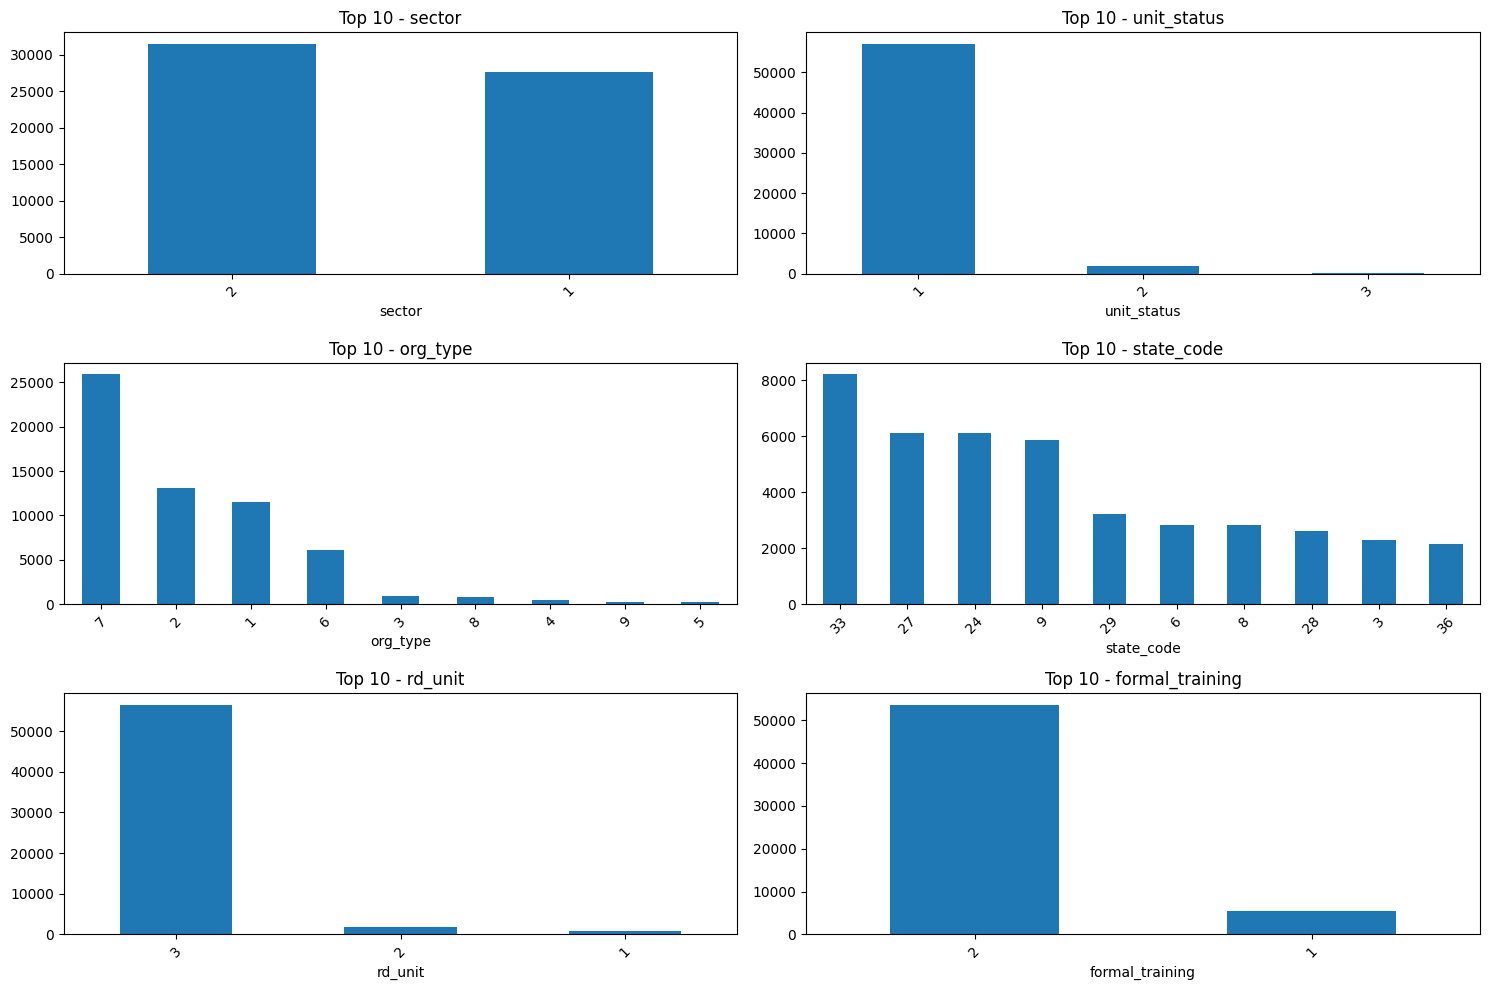

In [21]:

categorical_features = ['sector', 'unit_status', 'org_type', 'state_code','rd_unit','formal_training'  ]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    merged[feature].value_counts().head(10).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Top 10 - {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

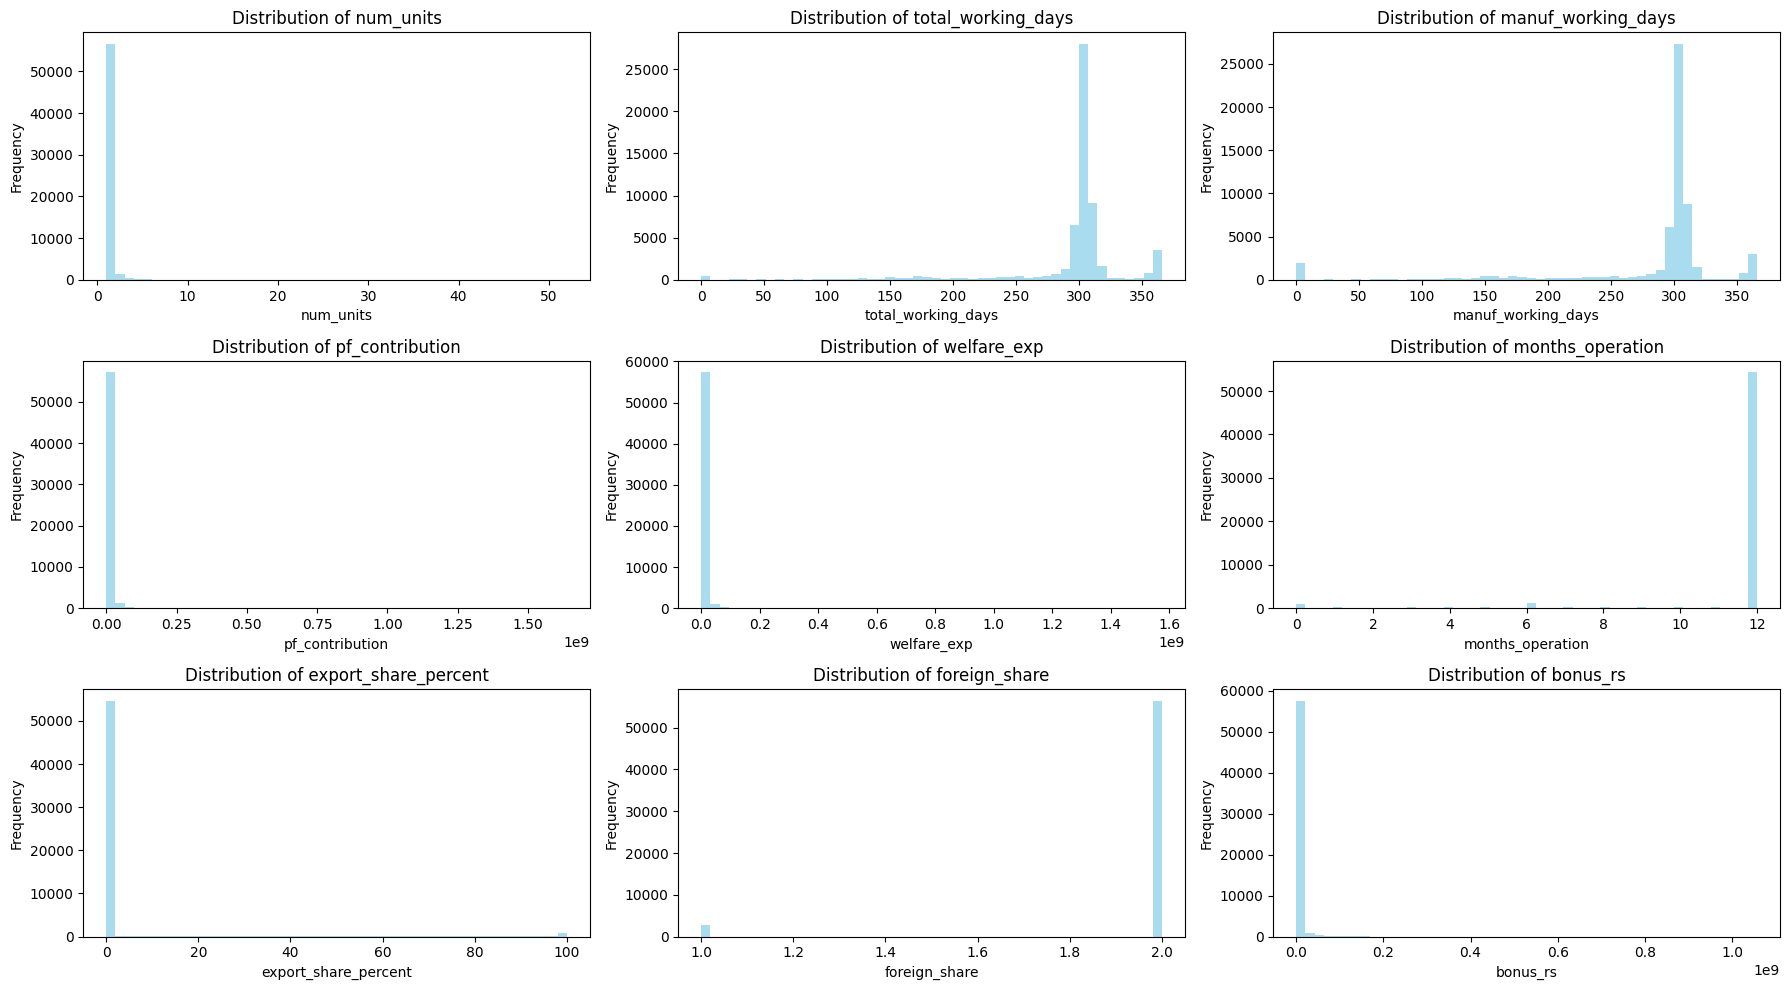

In [22]:

numerical_features = ['num_units', 'total_working_days', 'manuf_working_days', 
                     'pf_contribution', 'welfare_exp', 'months_operation','export_share_percent','foreign_share','bonus_rs' ]

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(merged[feature], bins=50, alpha=0.7, color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

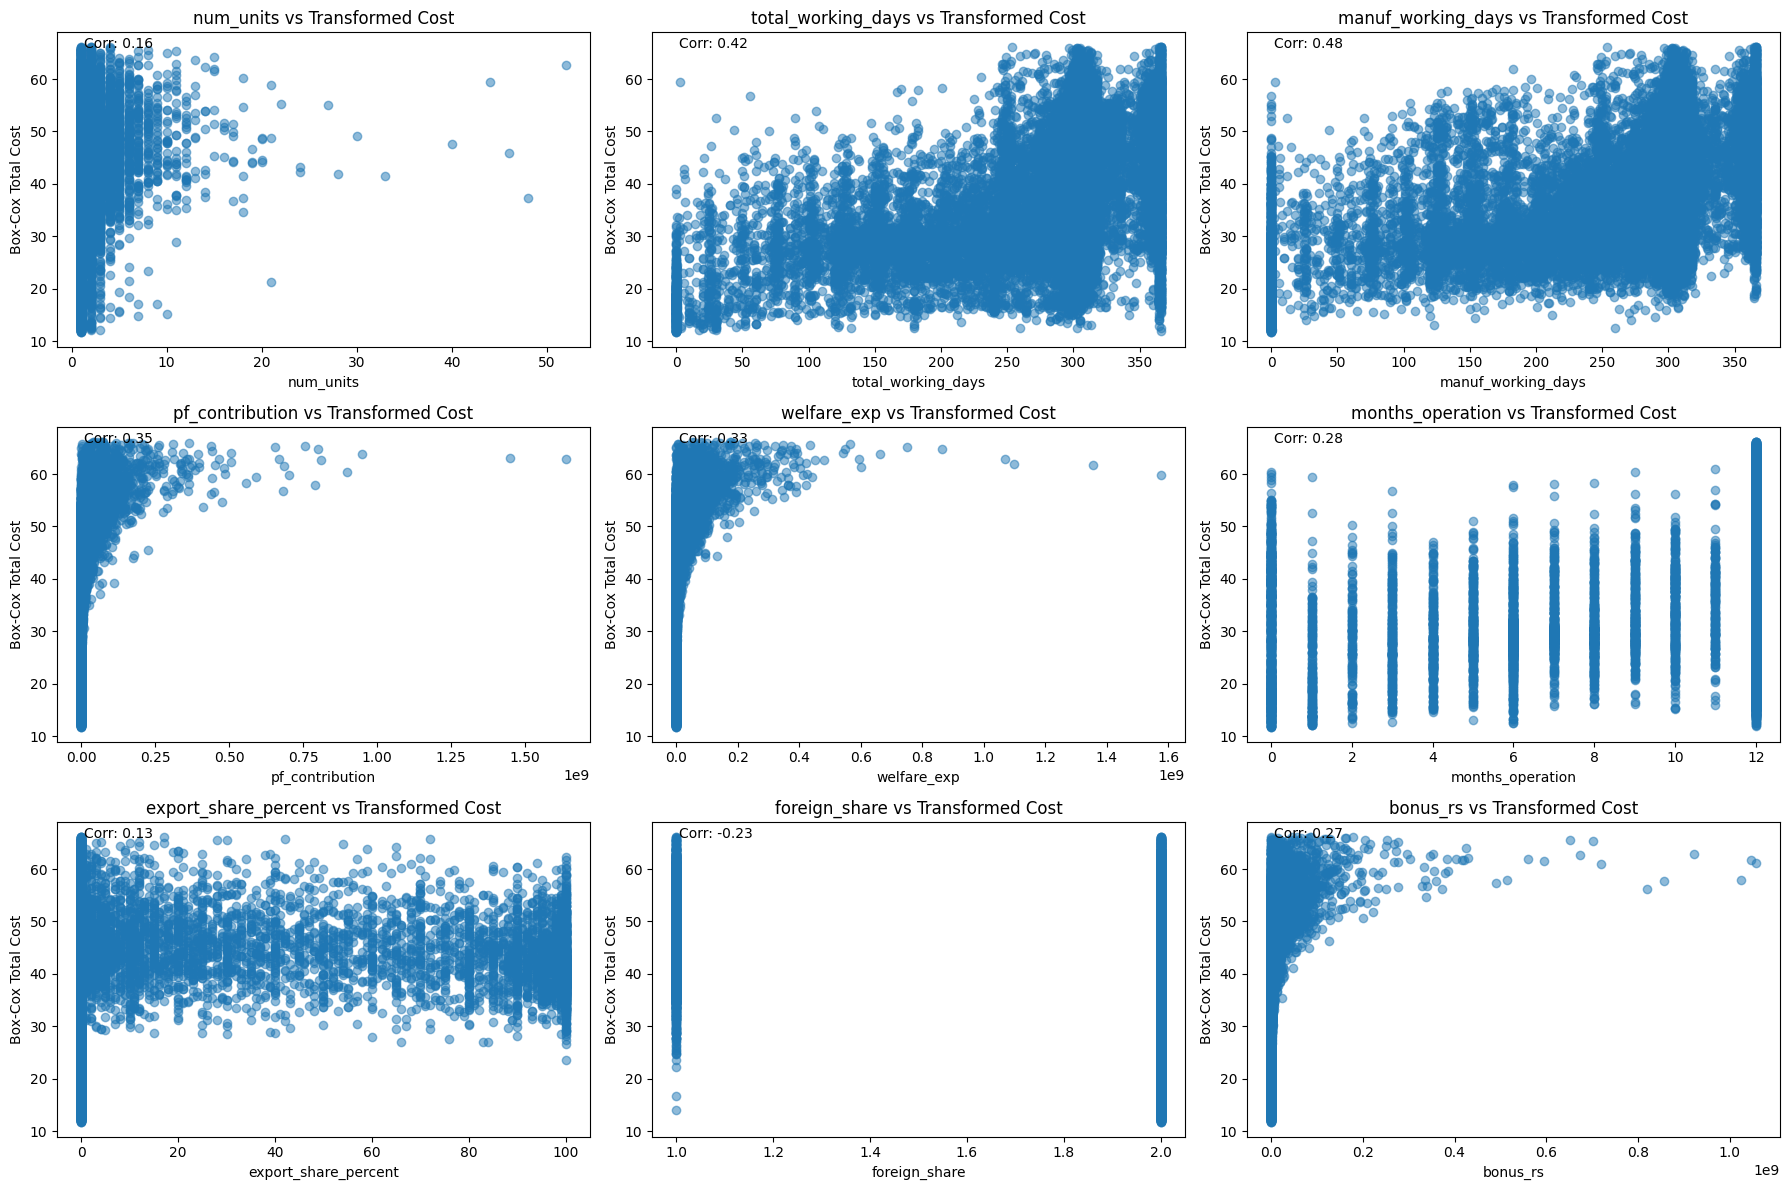

In [23]:
# 2.1 Numerical features vs Box-Cox Transformed Cost
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].scatter(merged[feature], merged['boxcox_total_cost'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Box-Cox Total Cost')
    axes[i].set_title(f'{feature} vs Transformed Cost')
    
    # Add correlation coefficient
    corr = merged[[feature, 'boxcox_total_cost']].corr().iloc[0,1]
    axes[i].annotate(f'Corr: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

plt.tight_layout()
plt.show()

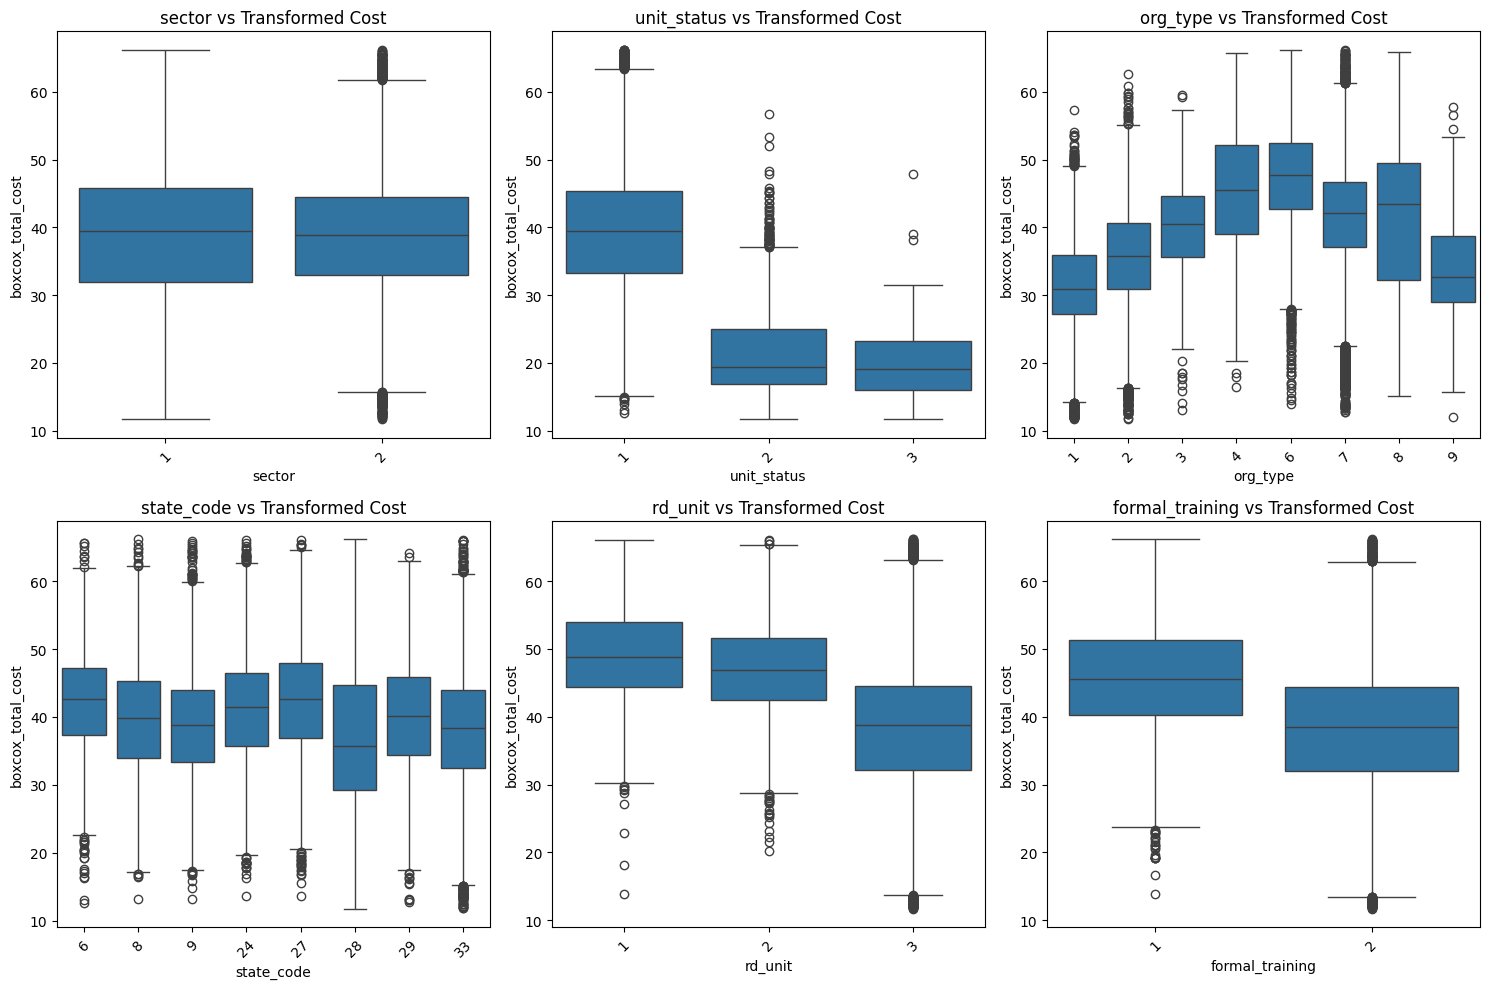

In [24]:
# 2.2 Categorical features vs Target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Sample if too many categories
    top_categories = merged[feature].value_counts().head(8).index
    filtered_data = merged[merged[feature].isin(top_categories)]
    
    sns.boxplot(data=filtered_data, x=feature, y='boxcox_total_cost', ax=axes[i])
    axes[i].set_title(f'{feature} vs Transformed Cost')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. **num_units - Production Scale**

Directly impacts total costs (more units = higher costs)

Fundamental production metric

Likely strong positive correlation

2. **total_working_days - Operational Intensity**

More working days = higher operational costs

Includes labor, utilities, overhead

Key cost driver

3. **manuf_working_days - Manufacturing Focus**

Specific to production activities

More manufacturing days = higher direct costs

More precise than total working days

4. **pf_contribution - Labor Costs**

Provident Fund = employee benefits cost

Direct labor cost component

Indicates workforce size/compensation

5. **welfare_exp - Employee Welfare Costs**

Additional labor-related expenses

Shows company's investment in workforce

Part of total operational costs

6. **months_operation - Business Maturity**

Longer operation = established processes

Could indicate efficiency gains (or inefficiencies)

Experience factor in cost management  

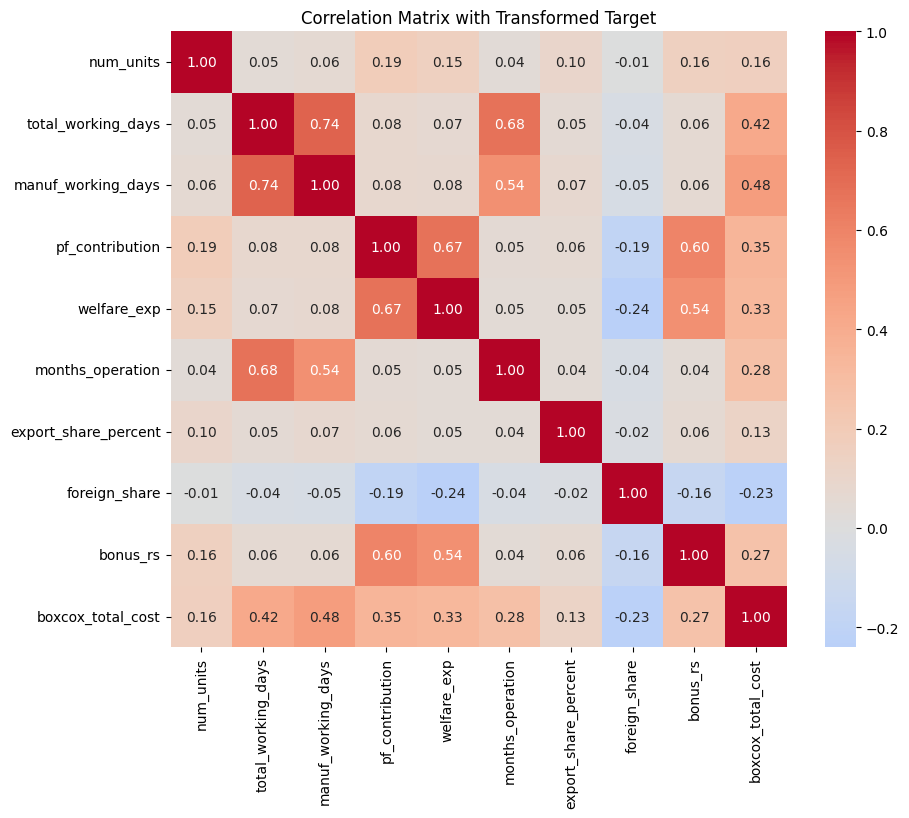

In [25]:
# 3.1 Correlation Heatmap
correlation_features = numerical_features + ['boxcox_total_cost']
corr_matrix = merged[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix with Transformed Target')
plt.show()

**Strong correlations found:**

pf_contribution (0.35) - labor costs

welfare_exp (0.33) - employee benefits

months_operation (0.28) - business maturity 

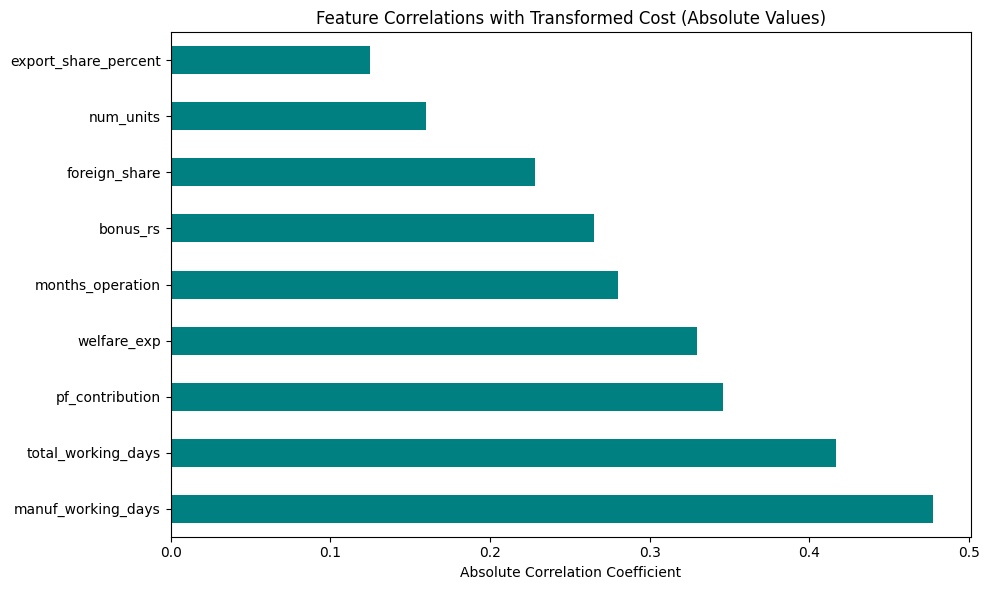

In [26]:
# 3.2 Target correlation with all features
target_correlations = merged[numerical_features + ['boxcox_total_cost']].corr()['boxcox_total_cost'].drop('boxcox_total_cost')
target_correlations_sorted = target_correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_correlations_sorted.plot(kind='barh', color='teal')
plt.title('Feature Correlations with Transformed Cost (Absolute Values)')
plt.xlabel('Absolute Correlation Coefficient')
plt.tight_layout()
plt.show()

In [27]:
# 6.1 Descriptive statistics
print("=== DESCRIPTIVE STATISTICS ===")
print(merged[numerical_features + ['boxcox_total_cost']].describe())

print("\n=== TARGET VARIABLE STATS ===")
print(f"Box-Cox Total Cost Stats:")
print(f"Mean: {merged['boxcox_total_cost'].mean():.2f}")
print(f"Std: {merged['boxcox_total_cost'].std():.2f}")
print(f"Min: {merged['boxcox_total_cost'].min():.2f}")
print(f"Max: {merged['boxcox_total_cost'].max():.2f}")
print(f"Skewness: {merged['boxcox_total_cost'].skew():.2f}")

print("\n=== TOP CORRELATIONS ===")
print(target_correlations.nlargest(5))

=== DESCRIPTIVE STATISTICS ===
          num_units  total_working_days  manuf_working_days  pf_contribution  \
count  59127.000000        59127.000000        59127.000000     5.912700e+04   
mean       1.239484          293.852961          283.811474     5.372173e+06   
std        1.026119           53.435017           71.360412     2.346643e+07   
min        1.000000            0.000000            0.000000     0.000000e+00   
25%        1.000000          300.000000          299.000000     1.021500e+04   
50%        1.000000          304.000000          304.000000     4.899090e+05   
75%        1.000000          308.000000          307.000000     3.127779e+06   
max       52.000000          366.000000          366.000000     1.638300e+09   

        welfare_exp  months_operation  export_share_percent  foreign_share  \
count  5.912700e+04      59127.000000          59127.000000   59127.000000   
mean   4.583352e+06         11.426134              4.222538       1.954488   
std    2.24573

In [28]:
# Remove or impute zero working days
merged_clean = merged[
    (merged['total_working_days'] > 0) & 
    (merged['manuf_working_days'] > 0)
].copy()

print(f"Removed {len(merged) - len(merged_clean)} rows with zero working days")

Removed 1920 rows with zero working days


In [29]:
# Create more meaningful features
merged_clean['cost_per_unit'] = merged_clean['boxcox_total_cost'] / merged_clean['num_units']
merged_clean['labor_cost_ratio'] = merged_clean['pf_contribution'] / (merged_clean['boxcox_total_cost'] + 1)
merged_clean['manuf_efficiency'] = merged_clean['manuf_working_days'] / merged_clean['total_working_days']

In [30]:
from scipy.stats.mstats import winsorize

# Winsorize top correlated features
features_to_winsorize = ['pf_contribution', 'welfare_exp', 'bonus_rs']
for feature in features_to_winsorize:
    merged_clean[f'{feature}_win'] = winsorize(merged_clean[feature], limits=[0.05, 0.05])

In [31]:
# Final feature selection based on correlations
final_numerical_features = [
    'pf_contribution', 'welfare_exp', 'months_operation', 
    'num_units', 'bonus_rs', 'export_share_percent'
]

final_categorical_features = [
    'sector', 'unit_status', 'org_type', 'state_code'
]

# Create feature set and target
X = merged_clean[final_numerical_features + final_categorical_features]
y = merged_clean['boxcox_total_cost']

# Handle categorical variables
X = pd.get_dummies(X, columns=final_categorical_features, drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (40044, 52)
Test set: (17163, 52)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Results:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")

Linear Regression Results:
R² Score: 0.4773
RMSE: 6.0344


In [34]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_,
    'abs_importance': np.abs(lr_model.coef_)
}).sort_values('abs_importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

Top 10 Most Important Features:
          feature  coefficient  abs_importance
13     org_type_6    12.204786       12.204786
7   unit_status_2   -11.620474       11.620474
11     org_type_4    11.477654       11.477654
8   unit_status_3   -10.394489       10.394489
15     org_type_8     8.196087        8.196087
14     org_type_7     8.039572        8.039572
12     org_type_5     7.956106        7.956106
30  state_code_15    -7.892130        7.892130
45  state_code_31    -7.854880        7.854880
10     org_type_3     6.368197        6.368197


In [35]:
# Create interaction features
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# Labor cost interactions
X_train_fe['total_labor_costs'] = X_train_fe['pf_contribution'] + X_train_fe['welfare_exp'] + X_train_fe['bonus_rs']
X_test_fe['total_labor_costs'] = X_test_fe['pf_contribution'] + X_test_fe['welfare_exp'] + X_test_fe['bonus_rs']

# Efficiency metrics
X_train_fe['cost_per_unit'] = X_train_fe['total_labor_costs'] / (X_train_fe['num_units'] + 1)
X_test_fe['cost_per_unit'] = X_test_fe['total_labor_costs'] / (X_test_fe['num_units'] + 1)

# Export intensity
X_train_fe['export_intensity'] = X_train_fe['export_share_percent'] * X_train_fe['months_operation']
X_test_fe['export_intensity'] = X_test_fe['export_share_percent'] * X_test_fe['months_operation']

In [36]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))

Ridge R²: 0.48263094402102524
Lasso R²: 0.47350941887350195


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Feature Importance
feature_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("\nTop 10 Important Features:")
print(feature_imp.head(10))

Random Forest R²: 0.698610654191514

Top 10 Important Features:
             feature  importance
0    pf_contribution    0.614688
1        welfare_exp    0.184407
4           bonus_rs    0.057778
6           sector_2    0.010103
2   months_operation    0.009734
47     state_code_33    0.008759
14        org_type_7    0.008669
13        org_type_6    0.007135
3          num_units    0.006985
39     state_code_24    0.006887


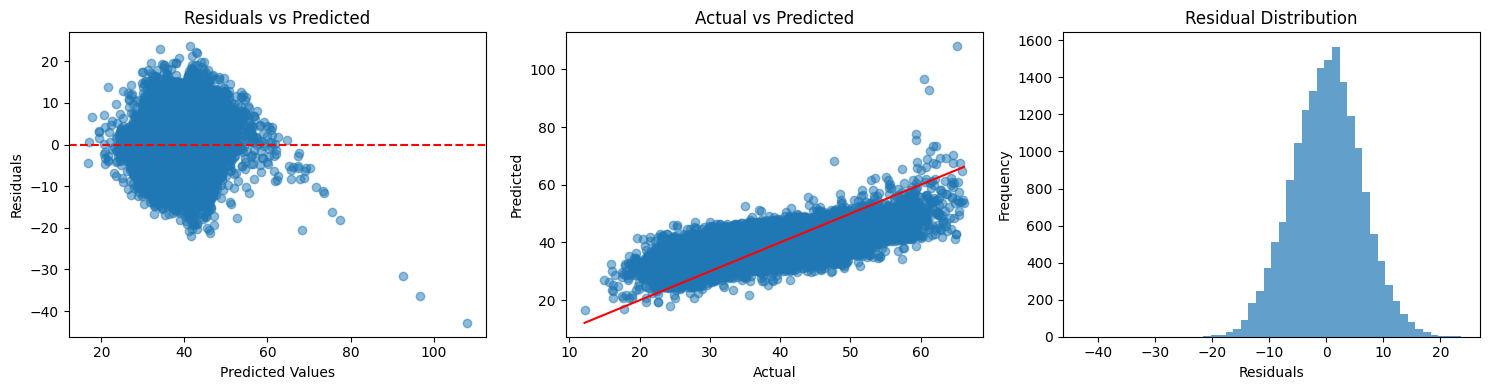

In [38]:
# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(15, 4))

# Residuals vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Actual vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Residual Distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

In [39]:
import sys
print(sys.executable)

#use when dependencies installed but still show error  
#copy the path them type / -m pip install .....
#it works 

d:\Users\Desktop\data\myenv\Scripts\python.exe


In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use your selected features
final_numerical_features = [
    'pf_contribution', 'welfare_exp', 'months_operation', 
    'num_units', 'bonus_rs', 'export_share_percent'
]

final_categorical_features = [
    'sector', 'unit_status', 'org_type', 'state_code'
]

# Create feature set and target
X = merged_clean[final_numerical_features + final_categorical_features]
y = merged_clean['boxcox_total_cost']

# Handle categorical variables
X = pd.get_dummies(X, columns=final_categorical_features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Number of features after encoding: {X_train.shape[1]}")

Training set: (45765, 52)
Test set: (11442, 52)
Number of features after encoding: 52


In [41]:
# Baseline XGBoost
xgb_baseline = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100
)

xgb_baseline.fit(X_train, y_train)
y_pred_base = xgb_baseline.predict(X_test)

print("=== Baseline XGBoost ===")
print(f"R² Score: {r2_score(y_test, y_pred_base):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_base)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_base):.4f}")

=== Baseline XGBoost ===
R² Score: 0.7268
RMSE: 4.3716
MAE: 3.4037


In [ ]:

param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 1],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1]
}

gb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=20,       
    scoring='r2',
    cv=3,           
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting Randomized Search CV (Fast Mode)...")
random_search.fit(X_train, y_train)


Starting Randomized Search CV (Fast Mode)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 1.0], 'gamma': [0, 0.1], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
# Get best model from random search
best_xgb = random_search.best_estimator_

# Predictions with tuned model
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\n=== Final Tuned XGBoost Performance ===")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Cross-validation scores
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2')
print(f"5-Fold CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


=== Final Tuned XGBoost Performance ===
Training R²: 0.7634
Test R²: 0.7296
Test RMSE: 4.3495
Test MAE: 3.3838
5-Fold CV R²: 0.7267 (+/- 0.0084)


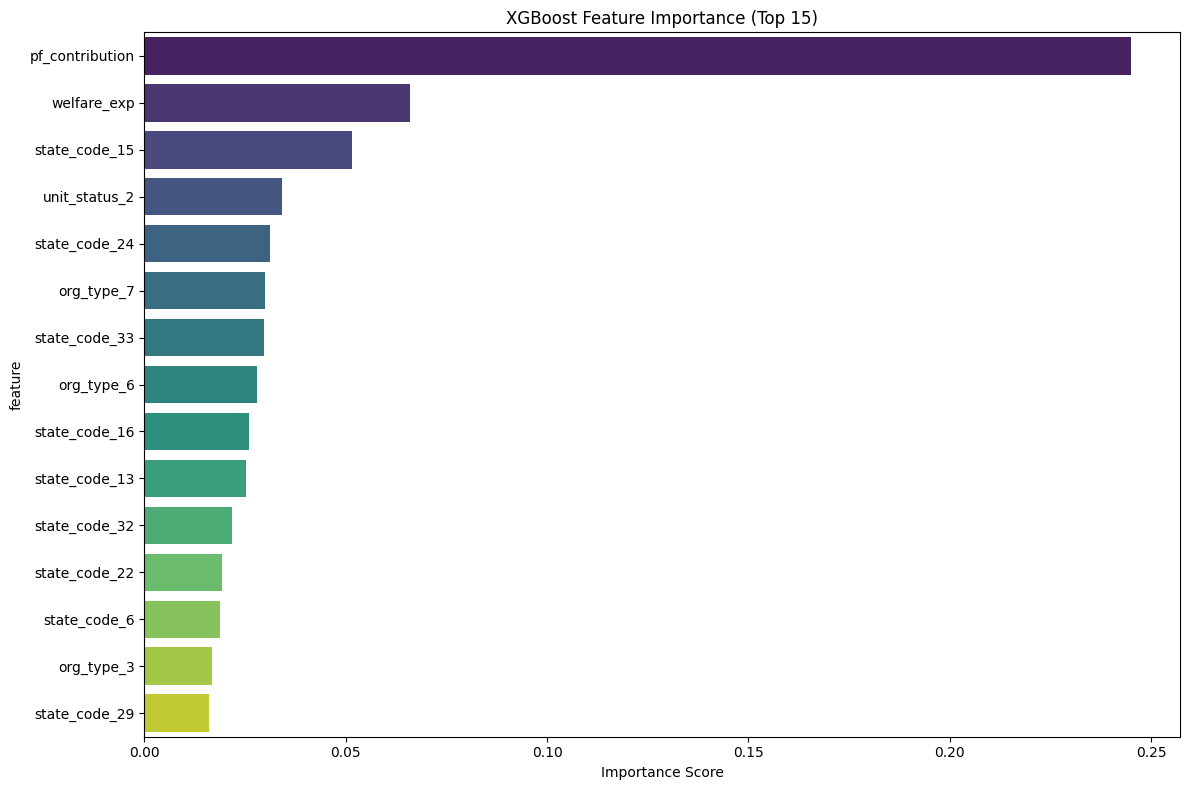


=== Top 10 Most Important Features ===
pf_contribution: 0.2450
welfare_exp: 0.0661
state_code_15: 0.0515
unit_status_2: 0.0341
state_code_24: 0.0312
org_type_7: 0.0299
state_code_33: 0.0298
org_type_6: 0.0280
state_code_16: 0.0260
state_code_13: 0.0253


In [44]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('XGBoost Feature Importance (Top 15)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n=== Top 10 Most Important Features ===")
for i, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

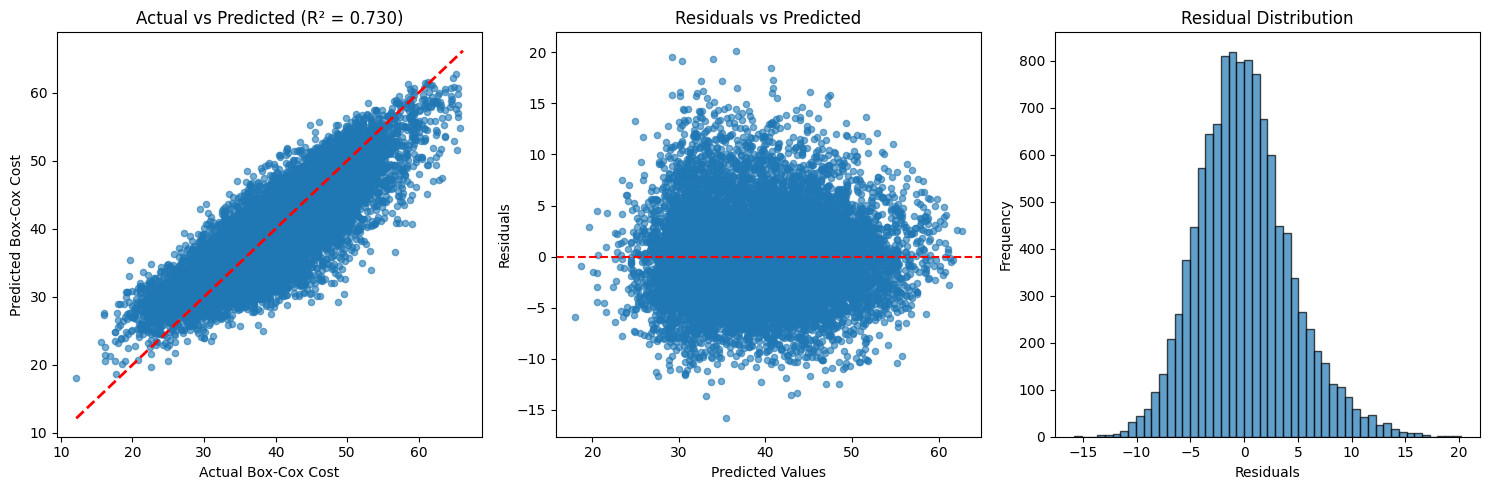

In [45]:
# Actual vs Predicted plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6, s=20)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Box-Cox Cost')
plt.ylabel('Predicted Box-Cox Cost')
plt.title(f'Actual vs Predicted (R² = {test_r2:.3f})')

# Residual plot
residuals = y_test - y_pred_test
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test, residuals, alpha=0.6, s=20)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Residual distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

In [46]:
# Compare with your previous Linear Regression
print("\n=== MODEL COMPARISON ===")
print(f"Linear Regression R²: 0.4773")
print(f"XGBoost Baseline R²: {r2_score(y_test, y_pred_base):.4f}")
print(f"XGBoost Tuned R²: {test_r2:.4f}")

improvement_vs_lr = ((test_r2 - 0.4773) / 0.4773) * 100
improvement_vs_base = ((test_r2 - r2_score(y_test, y_pred_base)) / r2_score(y_test, y_pred_base)) * 100

print(f"Improvement over Linear Regression: {improvement_vs_lr:.1f}%")
print(f"Improvement over XGBoost Baseline: {improvement_vs_base:.1f}%")


=== MODEL COMPARISON ===
Linear Regression R²: 0.4773
XGBoost Baseline R²: 0.7268
XGBoost Tuned R²: 0.7296
Improvement over Linear Regression: 52.9%
Improvement over XGBoost Baseline: 0.4%


 #  Test Set Analysis

In [48]:
print("\n=== COMPREHENSIVE UNSEEN DATA ANALYSIS ===")

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))


# --- 1. Test Set Metrics ---
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_adj_r2 = adjusted_r2(test_r2, len(y_test), X_test.shape[1])

print("Test Set Performance:")
print(f"R²: {test_r2:.4f}")
print(f"Adjusted R²: {test_adj_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

# --- 2. Compare Train vs Test ---
train_r2 = r2_score(y_train, y_pred_train)
performance_gap = train_r2 - test_r2

print("\nTrain vs Test Comparison:")
print(f"Training R²: {train_r2:.4f}")
print(f"Performance Gap (Train - Test): {performance_gap:.4f}")

# Optional flag for model reliability
if performance_gap < 0.05:
    print("\nModel Stability: Excellent (Low Overfitting)")
elif performance_gap < 0.10:
    print("\nModel Stability: Moderate (Some Overfitting)")
else:
    print("\nModel Stability: Warning – High Overfitting")



=== COMPREHENSIVE UNSEEN DATA ANALYSIS ===
Test Set Performance:
R²: 0.7296
Adjusted R²: 0.7283
RMSE: 4.3495
MAE: 3.3838

Train vs Test Comparison:
Training R²: 0.7634
Performance Gap (Train - Test): 0.0338

Model Stability: Excellent (Low Overfitting)



=== PREDICTION ERROR ANALYSIS ===
Mean Error: 0.0458
Std of Errors: 4.3495
Max Overestimation: -15.8166
Max Underestimation: 20.1435
MAE: 3.3838
RMSE: 4.3495


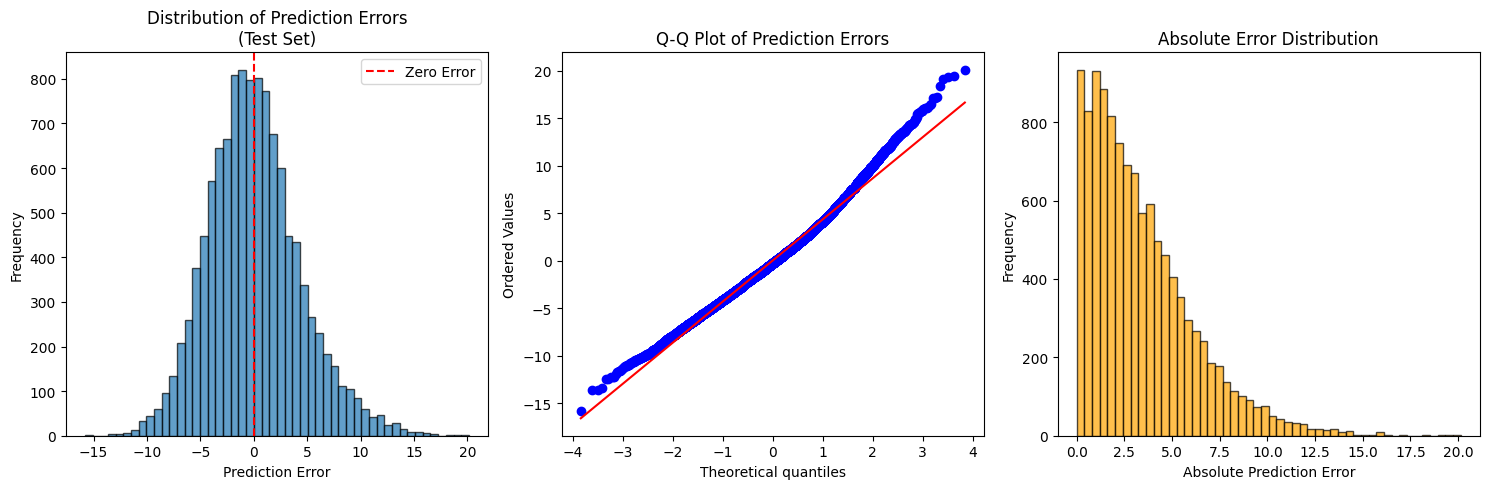

In [49]:
# Analyze prediction errors on test set
test_errors = y_test - y_pred_test
error_stats = {
    'Mean Error': test_errors.mean(),
    'Std of Errors': test_errors.std(),
    'Max Overestimation': test_errors.min(),  # Most negative = biggest overestimation
    'Max Underestimation': test_errors.max(), # Most positive = biggest underestimation
    'MAE': test_mae,
    'RMSE': test_rmse
}

print("\n=== PREDICTION ERROR ANALYSIS ===")
for stat, value in error_stats.items():
    print(f"{stat}: {value:.4f}")

# Error distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(test_errors, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors\n(Test Set)')
plt.legend()

# QQ-plot of errors
plt.subplot(1, 3, 2)
stats.probplot(test_errors, dist="norm", plot=plt)
plt.title('Q-Q Plot of Prediction Errors')

# Absolute errors
plt.subplot(1, 3, 3)
plt.hist(np.abs(test_errors), bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Absolute Prediction Error')
plt.ylabel('Frequency')
plt.title('Absolute Error Distribution')

plt.tight_layout()
plt.show()

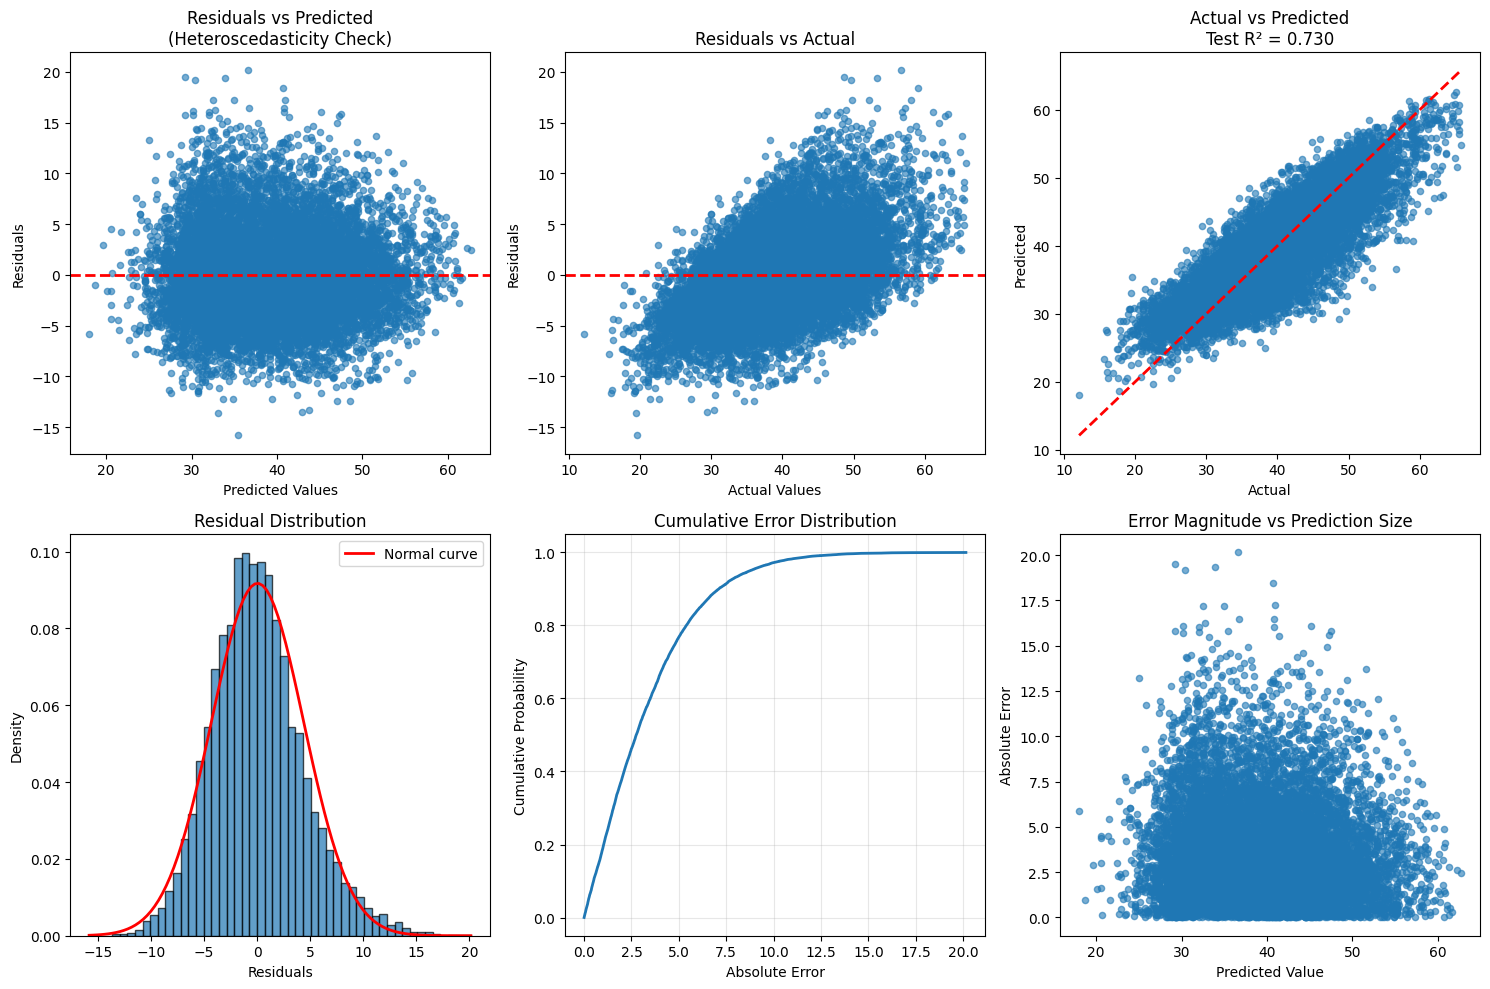

In [ ]:

plt.figure(figsize=(15, 10))

#  Residuals vs Predicted
plt.subplot(2, 3, 1)
plt.scatter(y_pred_test, test_errors, alpha=0.6, s=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted\n(Heteroscedasticity Check)')

#  Residuals vs Actual
plt.subplot(2, 3, 2)
plt.scatter(y_test, test_errors, alpha=0.6, s=20)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')

#  Actual vs Predicted with perfect fit line
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_test, alpha=0.6, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted\nTest R² = {test_r2:.3f}')

#  Residual distribution with normality curve
plt.subplot(2, 3, 4)
plt.hist(test_errors, bins=50, density=True, alpha=0.7, edgecolor='black')
# Add normal distribution curve
x_norm = np.linspace(test_errors.min(), test_errors.max(), 100)
y_norm = stats.norm.pdf(x_norm, test_errors.mean(), test_errors.std())
plt.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal curve')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residual Distribution')
plt.legend()

#  Cumulative error distribution
plt.subplot(2, 3, 5)
sorted_errors = np.sort(np.abs(test_errors))
cumulative_prob = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
plt.plot(sorted_errors, cumulative_prob, linewidth=2)
plt.xlabel('Absolute Error')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Error Distribution')
plt.grid(True, alpha=0.3)

#  Error by prediction magnitude
plt.subplot(2, 3, 6)
absolute_errors = np.abs(test_errors)
plt.scatter(y_pred_test, absolute_errors, alpha=0.6, s=20)
plt.xlabel('Predicted Value')
plt.ylabel('Absolute Error')
plt.title('Error Magnitude vs Prediction Size')

plt.tight_layout()
plt.show()


=== PREDICTION UNCERTAINTY ===
Estimated prediction standard deviation: 4.3697
Prediction interval coverage (95.0% CI): 0.946


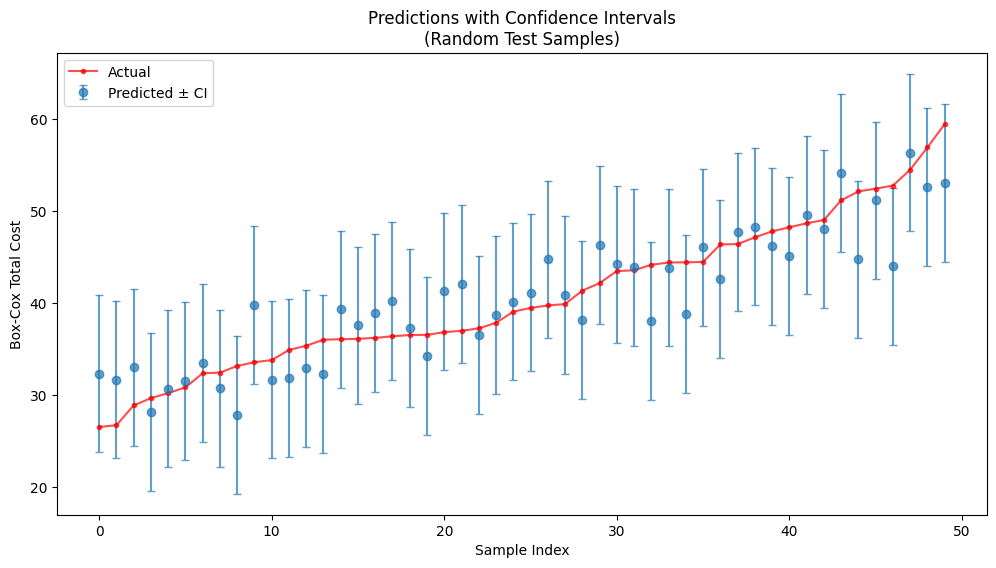

In [ ]:

from sklearn.model_selection import cross_val_predict

# Get cross-validation predictions on training data
cv_predictions = cross_val_predict(best_xgb, X_train, y_train, cv=5)
cv_errors = y_train - cv_predictions
prediction_std = cv_errors.std()

print(f"\n=== PREDICTION UNCERTAINTY ===")
print(f"Estimated prediction standard deviation: {prediction_std:.4f}")

# Calculate confidence intervals for test predictions
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

prediction_intervals = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Lower_CI': y_pred_test - z_score * prediction_std,
    'Upper_CI': y_pred_test + z_score * prediction_std
})

# Check coverage
coverage = ((y_test >= prediction_intervals['Lower_CI']) & 
            (y_test <= prediction_intervals['Upper_CI'])).mean()
print(f"Prediction interval coverage ({confidence_level*100}% CI): {coverage:.3f}")

# Plot some predictions with confidence intervals
sample_idx = np.random.choice(len(y_test), size=min(50, len(y_test)), replace=False)
sample_data = prediction_intervals.iloc[sample_idx].sort_values('Actual')

plt.figure(figsize=(12, 6))
plt.errorbar(range(len(sample_data)), sample_data['Predicted'], 
             yerr=z_score*prediction_std, fmt='o', alpha=0.7, 
             label='Predicted ± CI', capsize=3)
plt.plot(range(len(sample_data)), sample_data['Actual'], 'ro-', 
         alpha=0.7, label='Actual', markersize=3)
plt.xlabel('Sample Index')
plt.ylabel('Box-Cox Total Cost')
plt.title('Predictions with Confidence Intervals\n(Random Test Samples)')
plt.legend()
plt.show()

In [53]:
# Identify worst and best predictions
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Error': test_errors,
    'Absolute_Error': np.abs(test_errors)
}).sort_values('Absolute_Error', ascending=False)

print("\n=== WORST PREDICTIONS ANALYSIS ===")
print("Top 10 Worst Predictions:")
print(test_results.head(10))

print("\n=== BEST PREDICTIONS ANALYSIS ===")
print("Top 10 Best Predictions:")
print(test_results.tail(10))

# Analyze characteristics of worst predictions
worst_indices = test_results.head(20).index
if len(worst_indices) > 0:
    worst_predictions_features = X_test.loc[worst_indices]
    print(f"\nCharacteristics of 20 worst predictions:")
    print(worst_predictions_features[final_numerical_features].describe())


=== WORST PREDICTIONS ANALYSIS ===
Top 10 Worst Predictions:
          Actual  Predicted      Error  Absolute_Error
61840  56.697636  36.554173  20.143464       20.143464
35365  48.705214  29.203030  19.502184       19.502184
2962   53.291717  33.936836  19.354881       19.354881
7201   49.580780  30.412535  19.168245       19.168245
7091   59.115270  40.669800  18.445470       18.445470
29443  58.146582  40.886265  17.260317       17.260317
38737  49.758127  32.557602  17.200525       17.200525
27833  52.126281  34.929470  17.196811       17.196811
18336  53.237004  36.760765  16.476239       16.476239
7107   57.283602  40.828163  16.455439       16.455439

=== BEST PREDICTIONS ANALYSIS ===
Top 10 Best Predictions:
          Actual  Predicted     Error  Absolute_Error
58986  41.474123  41.477837 -0.003714        0.003714
16314  30.292252  30.294899 -0.002647        0.002647
2079   28.659256  28.656651  0.002606        0.002606
24639  44.486067  44.483665  0.002402        0.002402
668

In [56]:
import joblib
import pandas as pd
import numpy as np

# Save your trained model and feature names
joblib.dump(best_xgb, 'xgboost_production_cost_model.pkl')

# Save feature names and preprocessing info
model_artifacts = {
    'feature_names': X.columns.tolist(),
    'final_numerical_features': final_numerical_features,
    'final_categorical_features': final_categorical_features,
    'categorical_columns': final_categorical_features,  # Original categorical columns
    'training_columns': X.columns.tolist()  # All columns after one-hot encoding
}

joblib.dump(model_artifacts, 'model_artifacts.pkl')

print("Model and artifacts saved successfully!")

Model and artifacts saved successfully!
